In [15]:
import pandas as pd
import numpy as np
import os

In [ ]:
train_path = '../data_sample/train.csv'
test_path = '../data_sample/test.csv'

if os.path.exists(train_path) and os.path.exists(test_path):
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    print("Datasets cargados correctamente.")
    print(f"Tamaño del set de entrenamiento: {train_df.shape}")
    print(f"Tamaño del set de test: {test_df.shape}")
else:
    print("Error: No se encontraron los archivos en 'src/data_sample/'. Verifica la ruta.")

train_df.head()

Datasets cargados correctamente.
Tamaño del set de entrenamiento: (103904, 25)
Tamaño del set de test: (25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
print("Información del Dataset de Entrenamiento")
train_df.info()

print("\nValores Nulos por Columna")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

Información del Dataset de Entrenamiento
<class 'pandas.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  str    
 3   Customer Type                      103904 non-null  str    
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  str    
 6   Class                              103904 non-null  str    
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate loca

In [10]:
def basic_cleanup(df):
    cols_to_drop = ['Unnamed: 0', 'id']
    df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
    return df

train_df = basic_cleanup(train_df)
test_df = basic_cleanup(test_df)

print(f"Columnas finales después de limpieza: {train_df.columns.tolist()}")

Columnas finales después de limpieza: ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


In [11]:
# Limpieza

def basic_cleanup(df):
    cols_to_drop = ['Unnamed: 0', 'id']
    # Solo eliminamos si existen en el dataframe
    df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
    return df

train_df = basic_cleanup(train_df)
test_df = basic_cleanup(test_df)

print(f"Columnas finales después de limpieza: {train_df.columns.tolist()}")

Columnas finales después de limpieza: ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


In [12]:
df_full = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

median_delay = df_full['Arrival Delay in Minutes'].median()
df_full['Arrival Delay in Minutes'] = df_full['Arrival Delay in Minutes'].fillna(median_delay)

X = df_full.drop(columns=['satisfaction'])
y = df_full['satisfaction']

print(f"Nulos restantes en el dataset: {df_full.isnull().sum().sum()}")

Nulos restantes en el dataset: 0


C:\Users\daniel.m\AppData\Local\Temp\ipykernel_10760\3662462164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='magma')


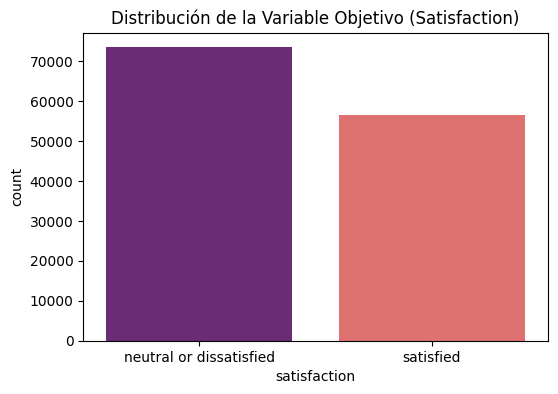

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='magma')
plt.title('Distribución de la Variable Objetivo (Satisfaction)')
plt.show()

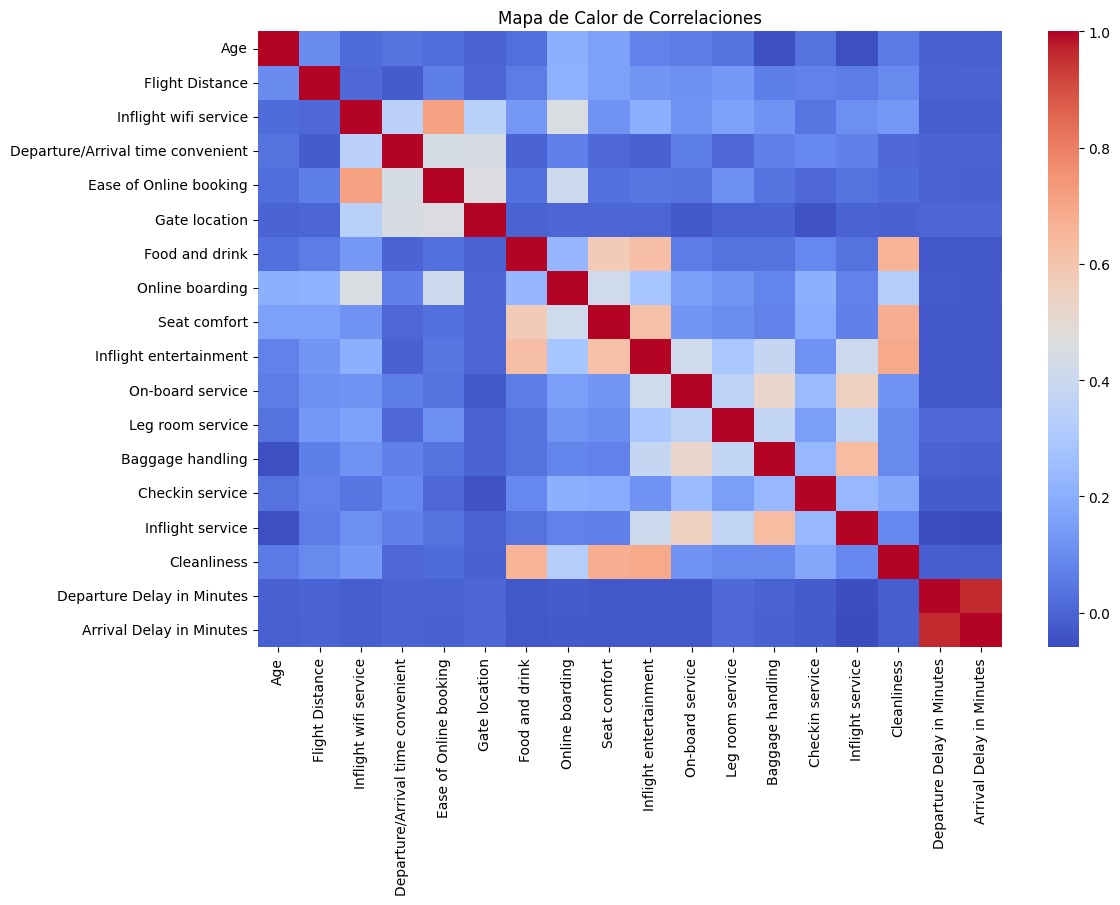

In [16]:
numeric_cols = df_full.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_full[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

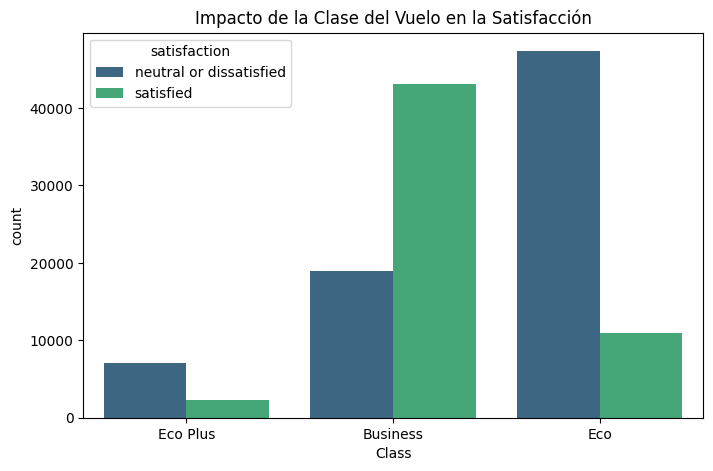

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_full, x='Class', hue='satisfaction', palette='viridis')
plt.title('Impacto de la Clase del Vuelo en la Satisfacción')
plt.show()

In [18]:
y = y.apply(lambda x: 1 if x == 'satisfied' else 0)

X = pd.get_dummies(X, drop_first=True)

print(f"Nuevas dimensiones tras el Encoding: {X.shape}")

Nuevas dimensiones tras el Encoding: (129880, 23)


In [20]:
from sklearn.model_selection import train_test_split

# Separamos de nuevo en X e y (asegúrate de que 'satisfaction' es el nombre de tu columna objetivo)
# y ya debe estar convertida a 0 y 1 por el paso anterior
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (103904, 23), y_train: (103904,)
X_test: (25976, 23), y_test: (25976,)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Creamos y entrenamos el baseline
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_baseline = baseline_model.predict(X_test)

print("--- RESULTADOS BASELINE (Logistic Regression) ---")
print(classification_report(y_test, y_pred_baseline))

--- RESULTADOS BASELINE (Logistic Regression) ---
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     14690
           1       0.85      0.84      0.84     11286

    accuracy                           0.87     25976
   macro avg       0.86      0.86      0.86     25976
weighted avg       0.87      0.87      0.87     25976



c:\Users\daniel.m\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Entrenamos un modelo más robusto
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_rf = rf_model.predict(X_test)

print("--- RESULTADOS MODELO AVANZADO (Random Forest) ---")
print(classification_report(y_test, y_pred_rf))

--- RESULTADOS MODELO AVANZADO (Random Forest) ---
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14690
           1       0.97      0.94      0.95     11286

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definimos el espacio de búsqueda (qué parámetros queremos probar)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Configuramos la búsqueda con validación cruzada (CV)
# cv=3 para que no tarde demasiado en tu ordenador
random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_dist, 
    n_iter=5, # Prueba 5 combinaciones aleatorias
    cv=3, 
    random_state=42, 
    n_jobs=-1 # Usa todos los núcleos de tu procesador
)

# Entrenamos la búsqueda
random_search.fit(X_train, y_train)

# Guardamos el mejor modelo encontrado
best_model = random_search.best_estimator_

print(f"✅ Mejores parámetros: {random_search.best_params_}")

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluamos el modelo optimizado
y_final_pred = best_model.predict(X_test)

print("--- EVALUACIÓN FINAL (Modelo Optimizado) ---")
print(classification_report(y_test, y_final_pred))

# Visualizar la matriz de confusión (esto es vital para tu presentación)
# Nos dice cuántos pasajeros predijimos bien y en cuáles fallamos
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title('Matriz de Confusión: Modelo Final')
plt.show()

In [ ]:
import joblib
import os

# 1. Crear la carpeta si no existe
model_path = 'src/models/'
if not os.path.exists(model_path):
    os.makedirs(model_path)

# 2. Guardar el modelo entrenado
model_filename = os.path.join(model_path, 'model_final_airline.joblib')
joblib.dump(best_model, model_filename)

print(f"💾 Modelo guardado correctamente en: {model_filename}")